<a href="https://colab.research.google.com/github/sreenivasulu-dev/Insurance-Claim-Predictions/blob/main/INSURANCECLAIMPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSURANCE CLAIM PREDICTION

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

# 2.SET OPTIONS

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

# 3.READ DATA

In [ ]:
df_insurance =pd.read_csv("/content/healthinsurance.csv")
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.000000,male,64,24.300000,NoDisease,1,0,NewYork,72,0,0,Actor,13112.600000
1,49.000000,female,75,22.600000,NoDisease,1,0,Boston,78,1,1,Engineer,9567.000000
2,32.000000,female,64,17.800000,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.200000
3,61.000000,female,53,36.400000,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.600000
4,19.000000,female,50,20.600000,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.700000


# 4.DATA ANALYSIS AND PREPARATION

In [ ]:
df_insurance.shape

(15000, 13)

In [ ]:
df_insurance.dtypes

,0
age,float64
sex,object
weight,int64
bmi,float64
hereditary_diseases,object
no_of_dependents,int64
smoker,int64
city,object
bloodpressure,int64
diabetes,int64


 Change the incorrect data types

In [ ]:
df_insurance.smoker = df_insurance.smoker.astype('object')
df_insurance.diabetes = df_insurance.diabetes.astype('object')
df_insurance.regular_ex = df_insurance.regular_ex.astype('object')

Recheck the data types after the conversion

In [ ]:
df_insurance.dtypes

,0
age,float64
sex,object
weight,int64
bmi,float64
hereditary_diseases,object
no_of_dependents,int64
smoker,object
city,object
bloodpressure,int64
diabetes,object


 Summary Statistics

In [ ]:
# describe the numerical data
df_insurance.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,68.650133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,19.418515,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,71.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


In [ ]:
# describe the categorical data
# include=object: selects the categorical features
df_insurance.describe(include = object)

# Note: If we pass 'include=object' to the .describe(),
#       it will return descriptive statistics for categorical variables only

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,NewOrleans,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


Missing Values

In [ ]:
# obtain the total missing values for each variable
# 'isnull().sum()' returns the number of missing values in each variable
# sort the variables on the basis of total null values in the variable using sort_values()
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_insurance.isnull().sum().sort_values(ascending=False)

# 'isnull().sum()' returns the number of missing values in each variable
# 'isnull().count()' returns the count of the data, i.e. count of outcomes 'True' and 'False' of isnull()
# sort the variables on the basis of total null values in the variable using sort_values()
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_insurance.isnull().sum()*100/df_insurance.isnull().count()).sort_values(ascending=False)

# concat the 'Total' and 'Percent' columns using 'concat' function
# keys:pass a list of column names in parameter
# axis = 1: concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
bmi,956,6.373333
age,396,2.640000
sex,0,0.000000
weight,0,0.000000
hereditary_diseases,0,0.000000
no_of_dependents,0,0.000000
smoker,0,0.000000
city,0,0.000000
bloodpressure,0,0.000000
diabetes,0,0.000000


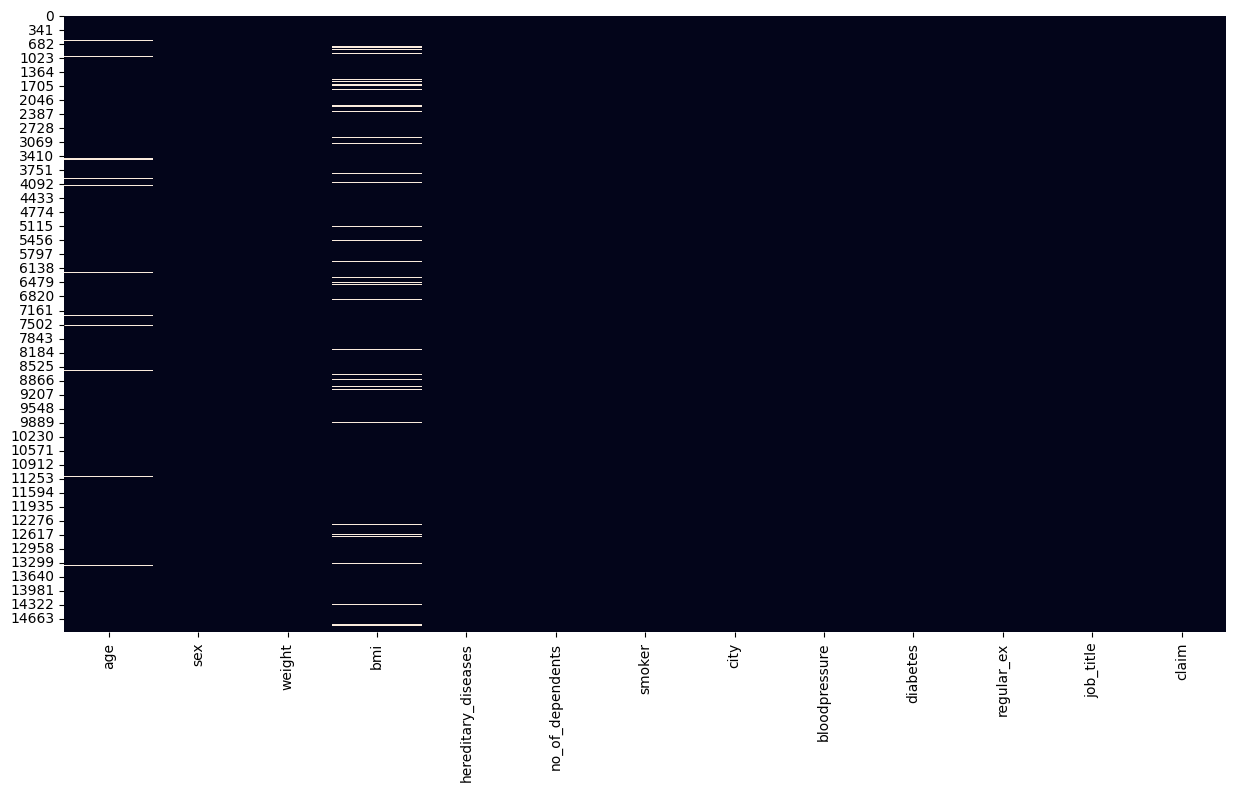

In [ ]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True'
sns.heatmap(df_insurance.isnull(), cbar=False)

# display the plot
plt.show()

In [ ]:
# check the average age for male and female
# group the age by sex using 'groupby'
# 'axis = 0' splits along rows
# mean(): returns the mean age for each sex
df_insurance['age'].groupby(df_insurance['sex'], axis=0).mean()

,age
sex,
female,39.361040
male,39.738395


In [ ]:
# fill the missing values with the mean value of 'age' using 'fillna()'
# mean(): returns the mean age
# inplace: makes permanent changes in the dataframe
df_insurance['age'].fillna(df_insurance['age'].mean(), inplace=True)

In [ ]:
# fill the missing values with the mean value of 'bmi' using 'fillna()'
# mean(): returns the mean bmi
# inplace: makes permanent changes in the dataframe
df_insurance['bmi'].fillna(df_insurance['bmi'].mean(), inplace=True)

In [ ]:
# calculate the median of the bloodpressure using 'median()''
median_bloodpressure = df_insurance['bloodpressure'].median()

# replace zero values by median using 'replace()'
df_insurance['bloodpressure'] = df_insurance['bloodpressure'].replace(0,median_bloodpressure)

In [ ]:
# obtain the summary statistics of numeric variables using 'describe()'
df_insurance.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,72.228533,13401.437620
std,13.829705,13.701935,5.924606,1.228469,11.269793,12148.239619
min,18.000000,34.000000,16.000000,0.000000,40.000000,1121.900000
25%,27.000000,54.000000,25.900000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.800000,1.000000,71.000000,9545.650000
75%,51.000000,76.000000,34.100000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


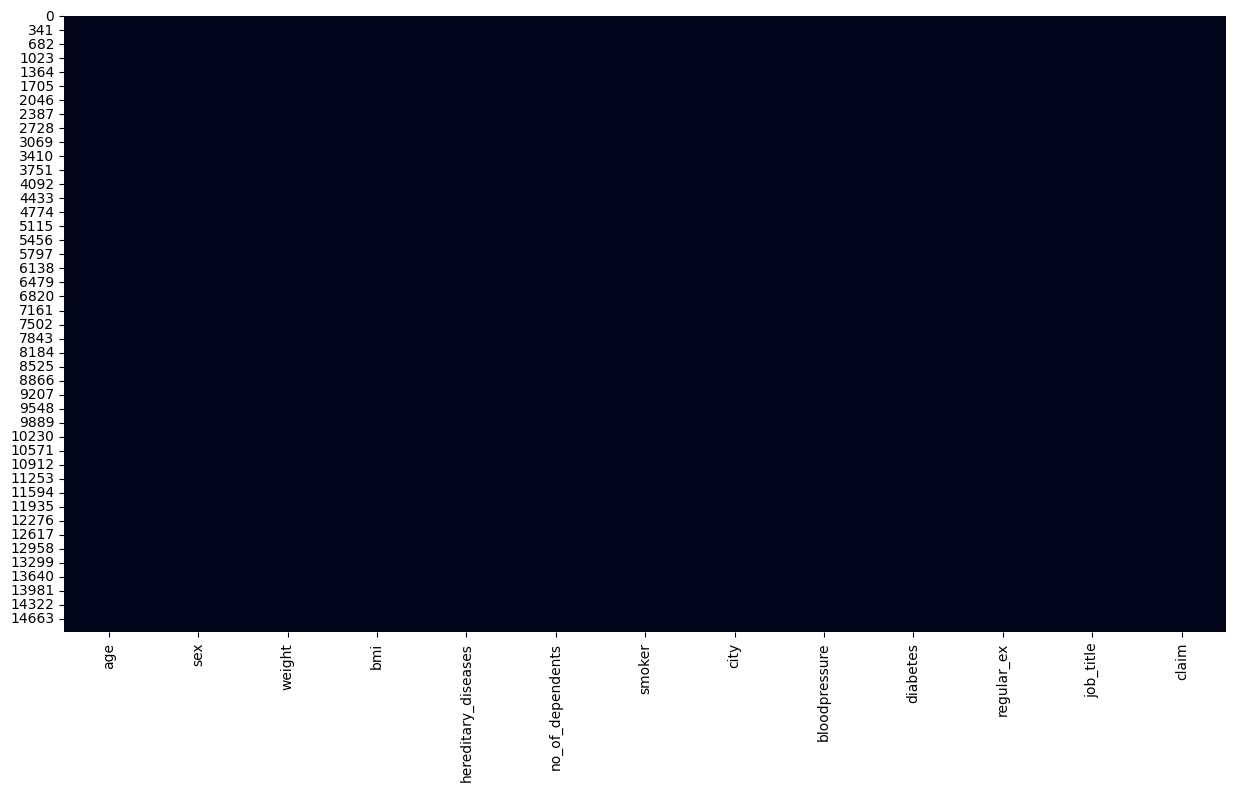

In [ ]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True'
sns.heatmap(df_insurance.isnull(), cbar=False)

# display the plot
plt.show()

Correlation

In [ ]:
# select the numerical features in the dataset using 'select_dtypes()'
# select_dtypes(include=np.number): considers the numeric variables
df_numeric_features = df_insurance.select_dtypes(include=np.number)

# print the names of the numeric variables
df_numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

In [ ]:
# generate the correlation matrix
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,age,weight,bmi,no_of_dependents,bloodpressure,claim
age,1.000000,0.281228,0.180123,0.058926,0.019223,0.298359
weight,0.281228,1.000000,0.243269,0.135687,0.018094,0.077716
bmi,0.180123,0.243269,1.000000,0.049704,-0.047979,0.197939
no_of_dependents,0.058926,0.135687,0.049704,1.000000,0.036976,0.067614
bloodpressure,0.019223,0.018094,-0.047979,0.036976,1.000000,0.037676
claim,0.298359,0.077716,0.197939,0.067614,0.037676,1.000000


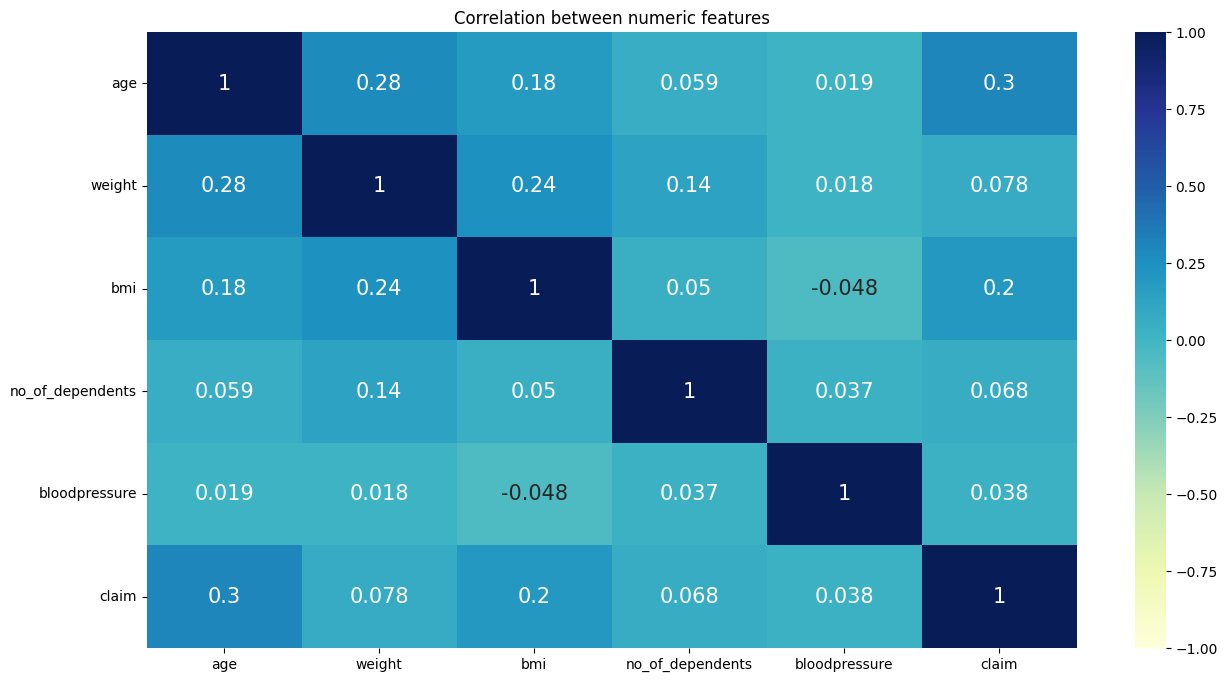

In [ ]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: Sets the font size of the annotation
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

Analyze Categorical Variables

In [ ]:
# display the summary statistics of categorical variables
# include=objec: selects the categoric features
df_insurance.describe(include=object)

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,NewOrleans,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


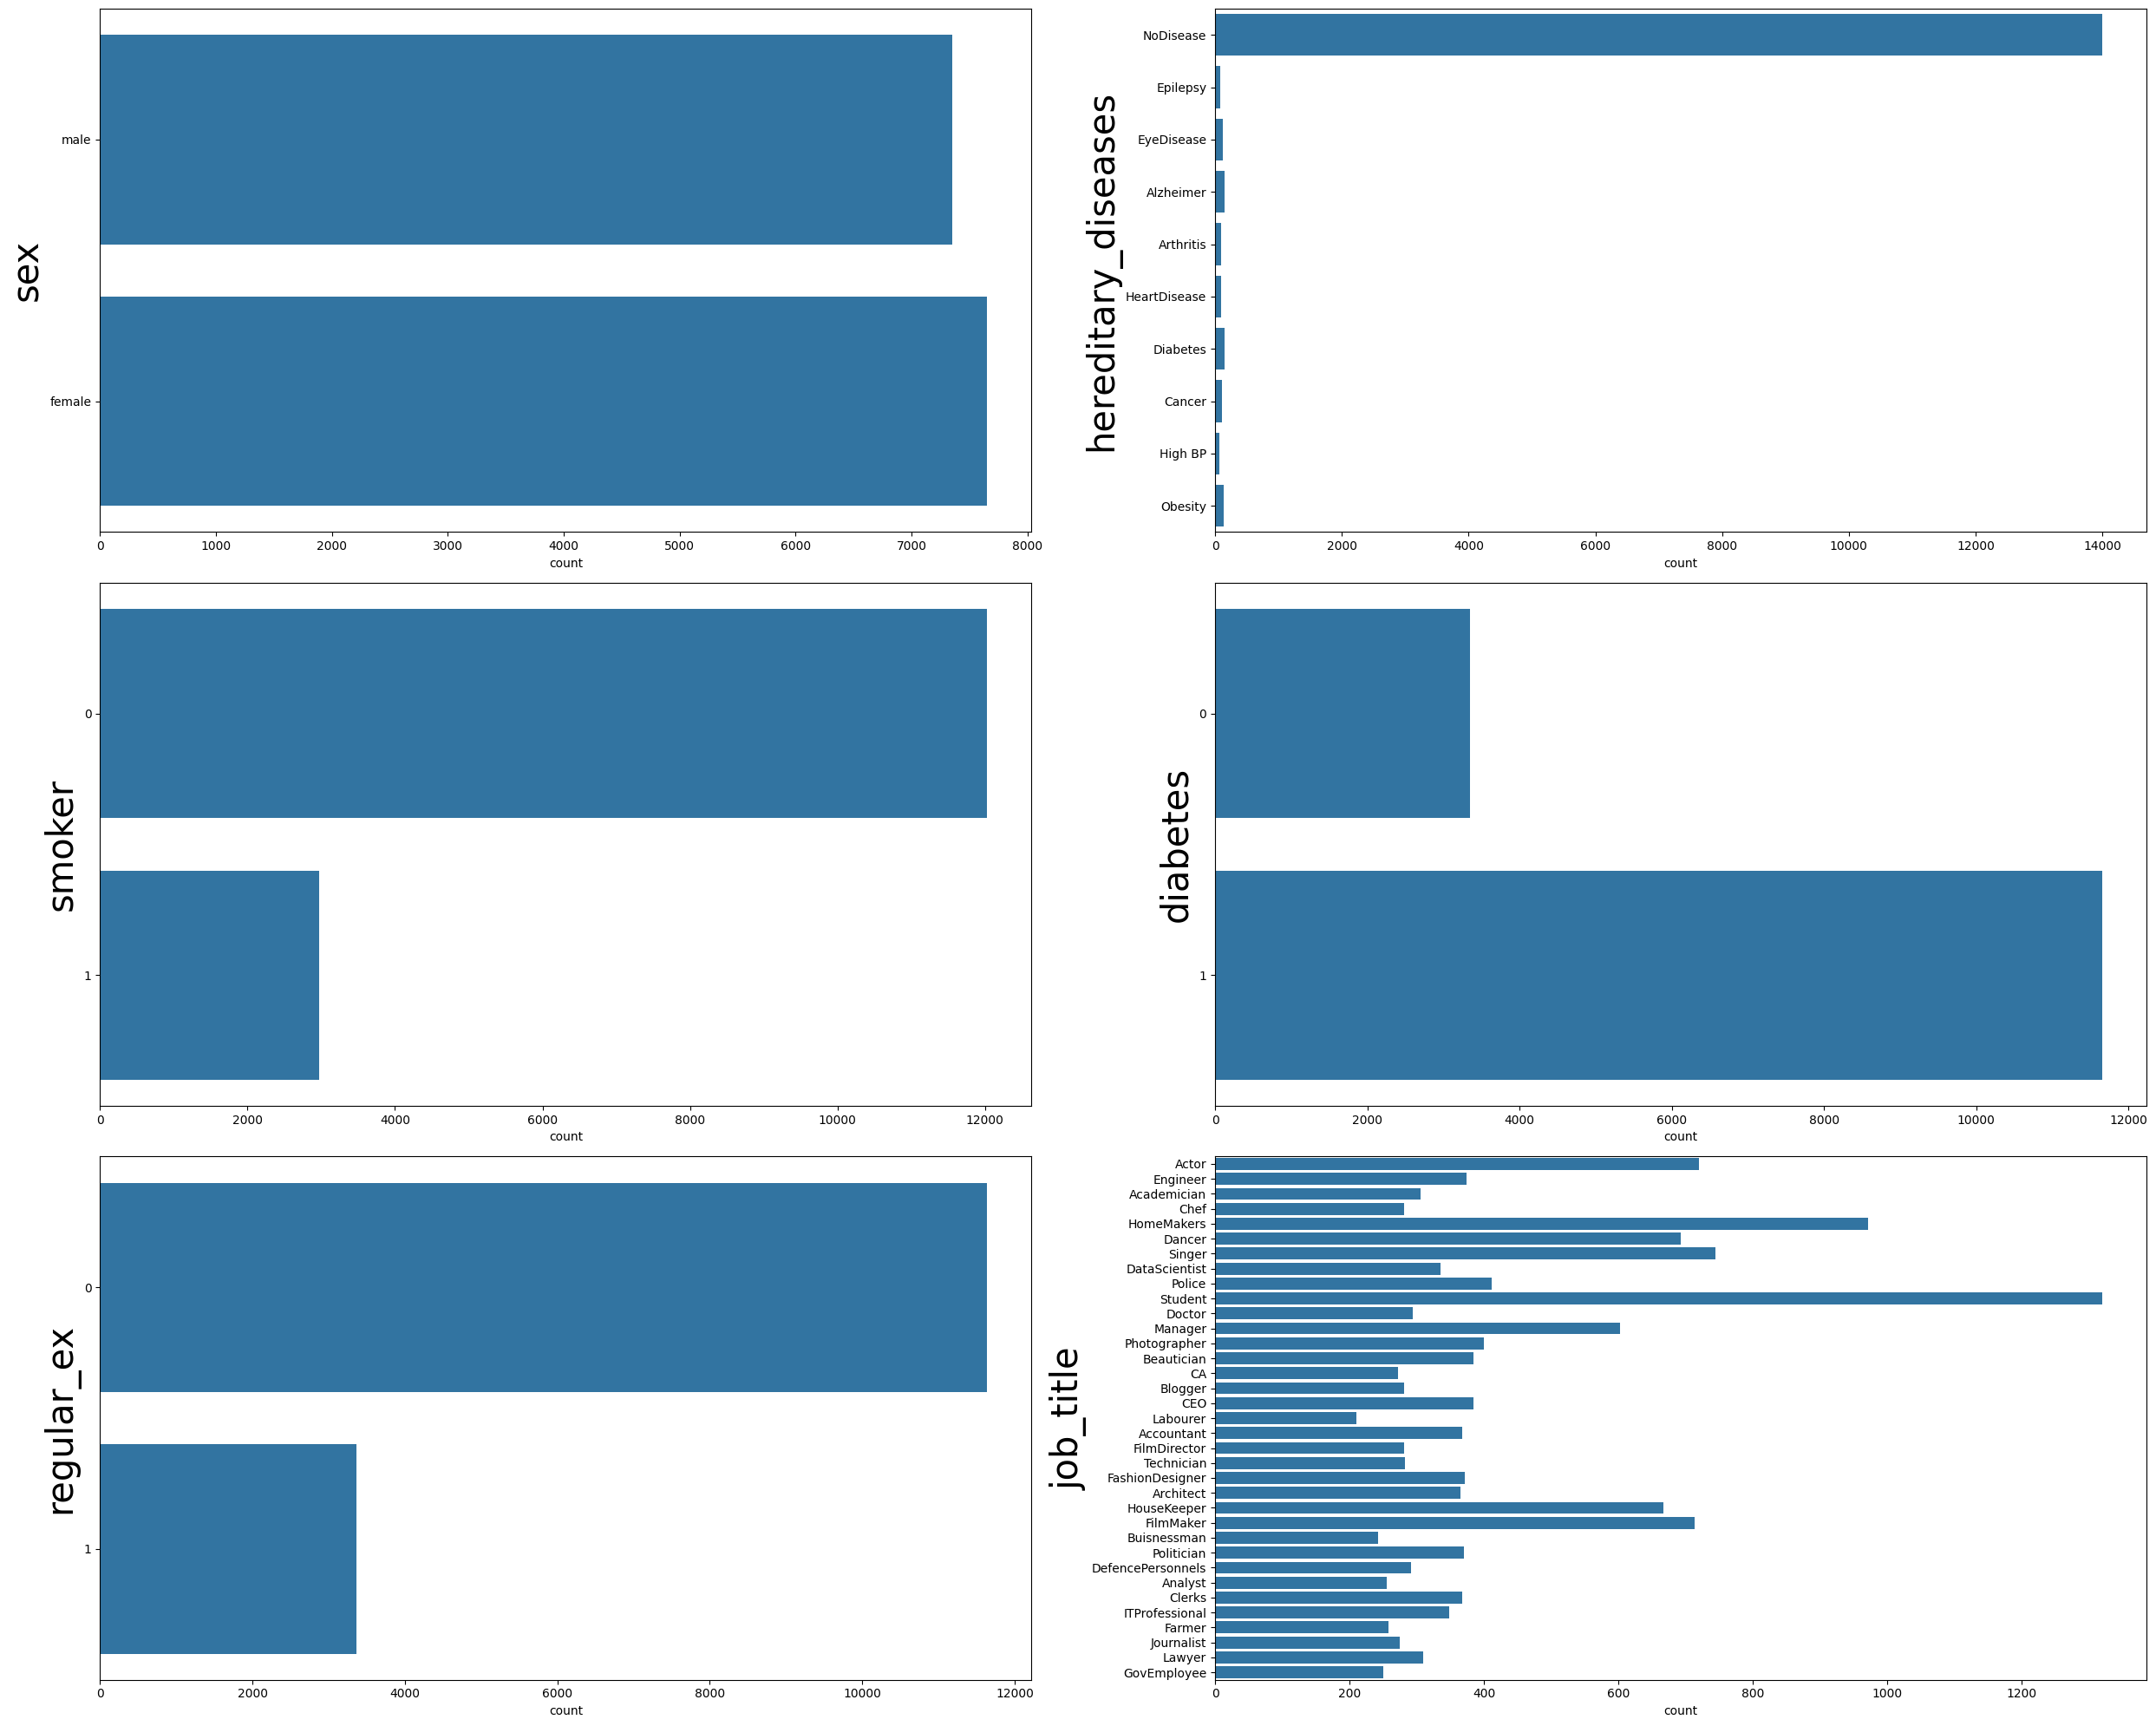

In [ ]:
# create a list of all categorical variables
# include=object: selects the categoric features
# drop(['city'],axis=1): drops the city column from the dataframe
df_categoric_features = df_insurance.select_dtypes(include='object').drop(['city'], axis=1)

# plot the count distribution for each categorical variable
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 2, figsize=(25, 20))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):

    # plot the count plot using countplot()
    # y: data on y axis
    # ax: specifies the axes object to draw the plot onto
    countplot = sns.countplot(y=df_insurance[variable], ax=subplot )

    # set the y-axis labels
    # fontsize = 30: sets the font size to 30
    countplot.set_ylabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()
plt.tight_layout()

# display the plot
plt.show()

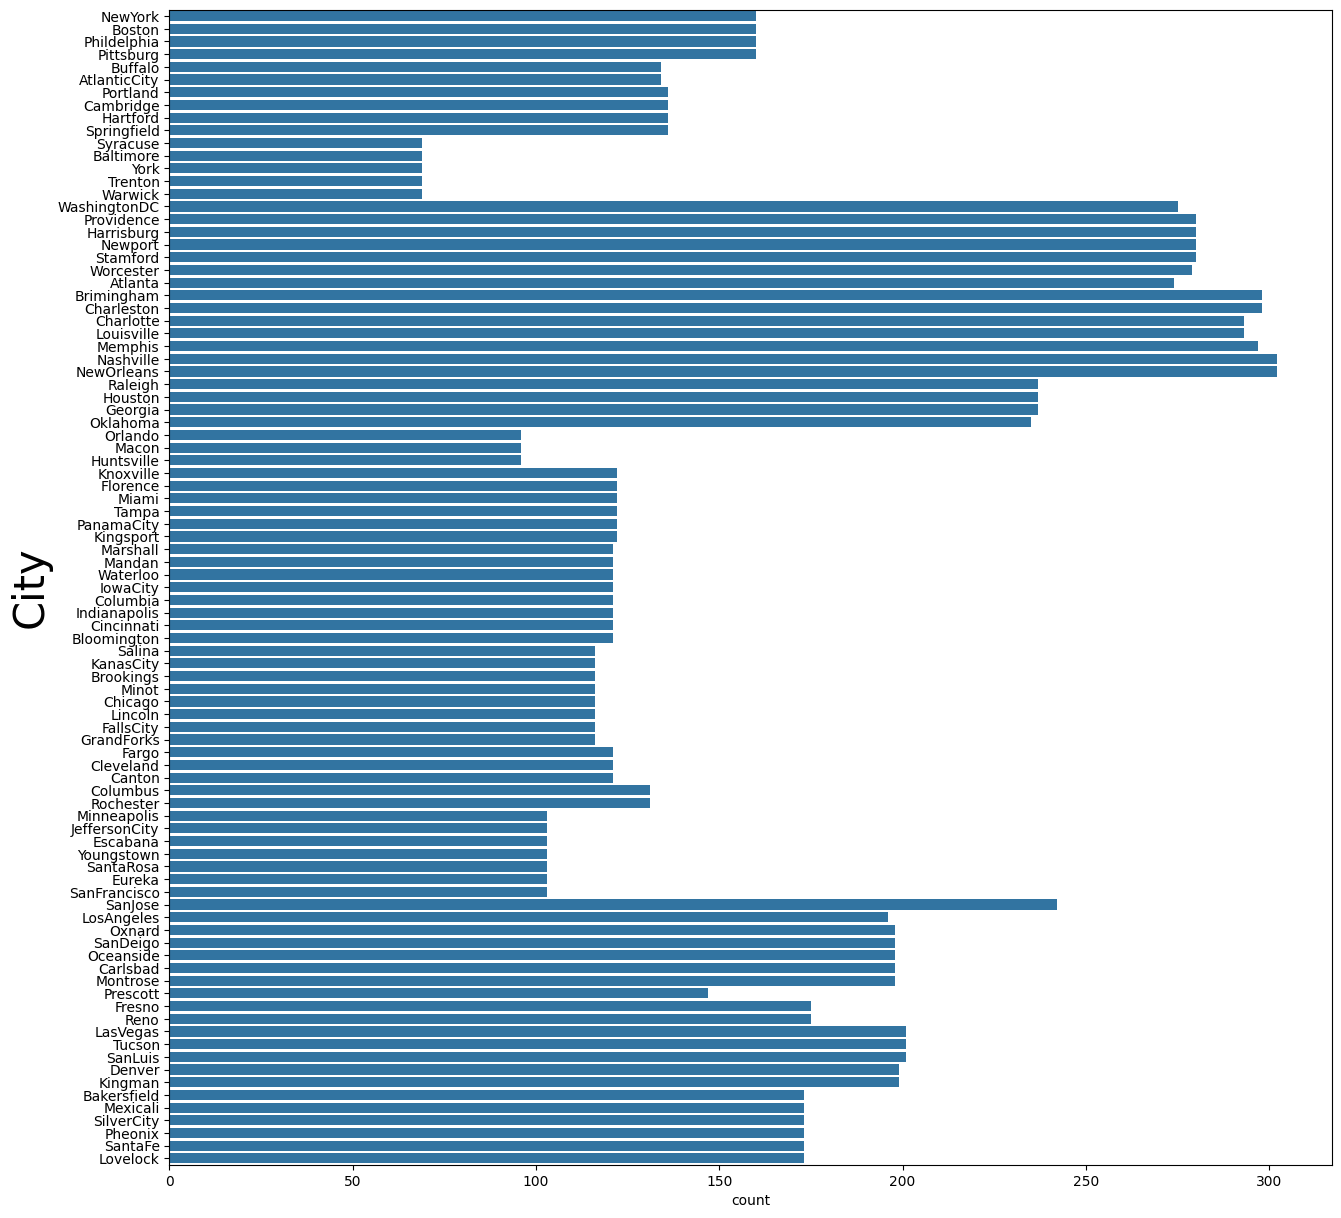

In [ ]:
# set the figure size
plt.figure(figsize=(15, 15))

# plot the count plot using countplot()
# y: specifies the data to be plotted on y-axis
# orient: specifies the orientation of the barplot. "h" is used for horizontal orientation
# by default the orientation is vertical; but can be specifies by "v"
countplot = sns.countplot(y=df_insurance['city'], orient="h")

# set the x-axis labels
# fontsize = 30: sets the font size to 30
countplot.set_ylabel('City', fontsize = 30)

# display the plot
plt.show()

Analyze Relationship Between Target and Categorical Variables

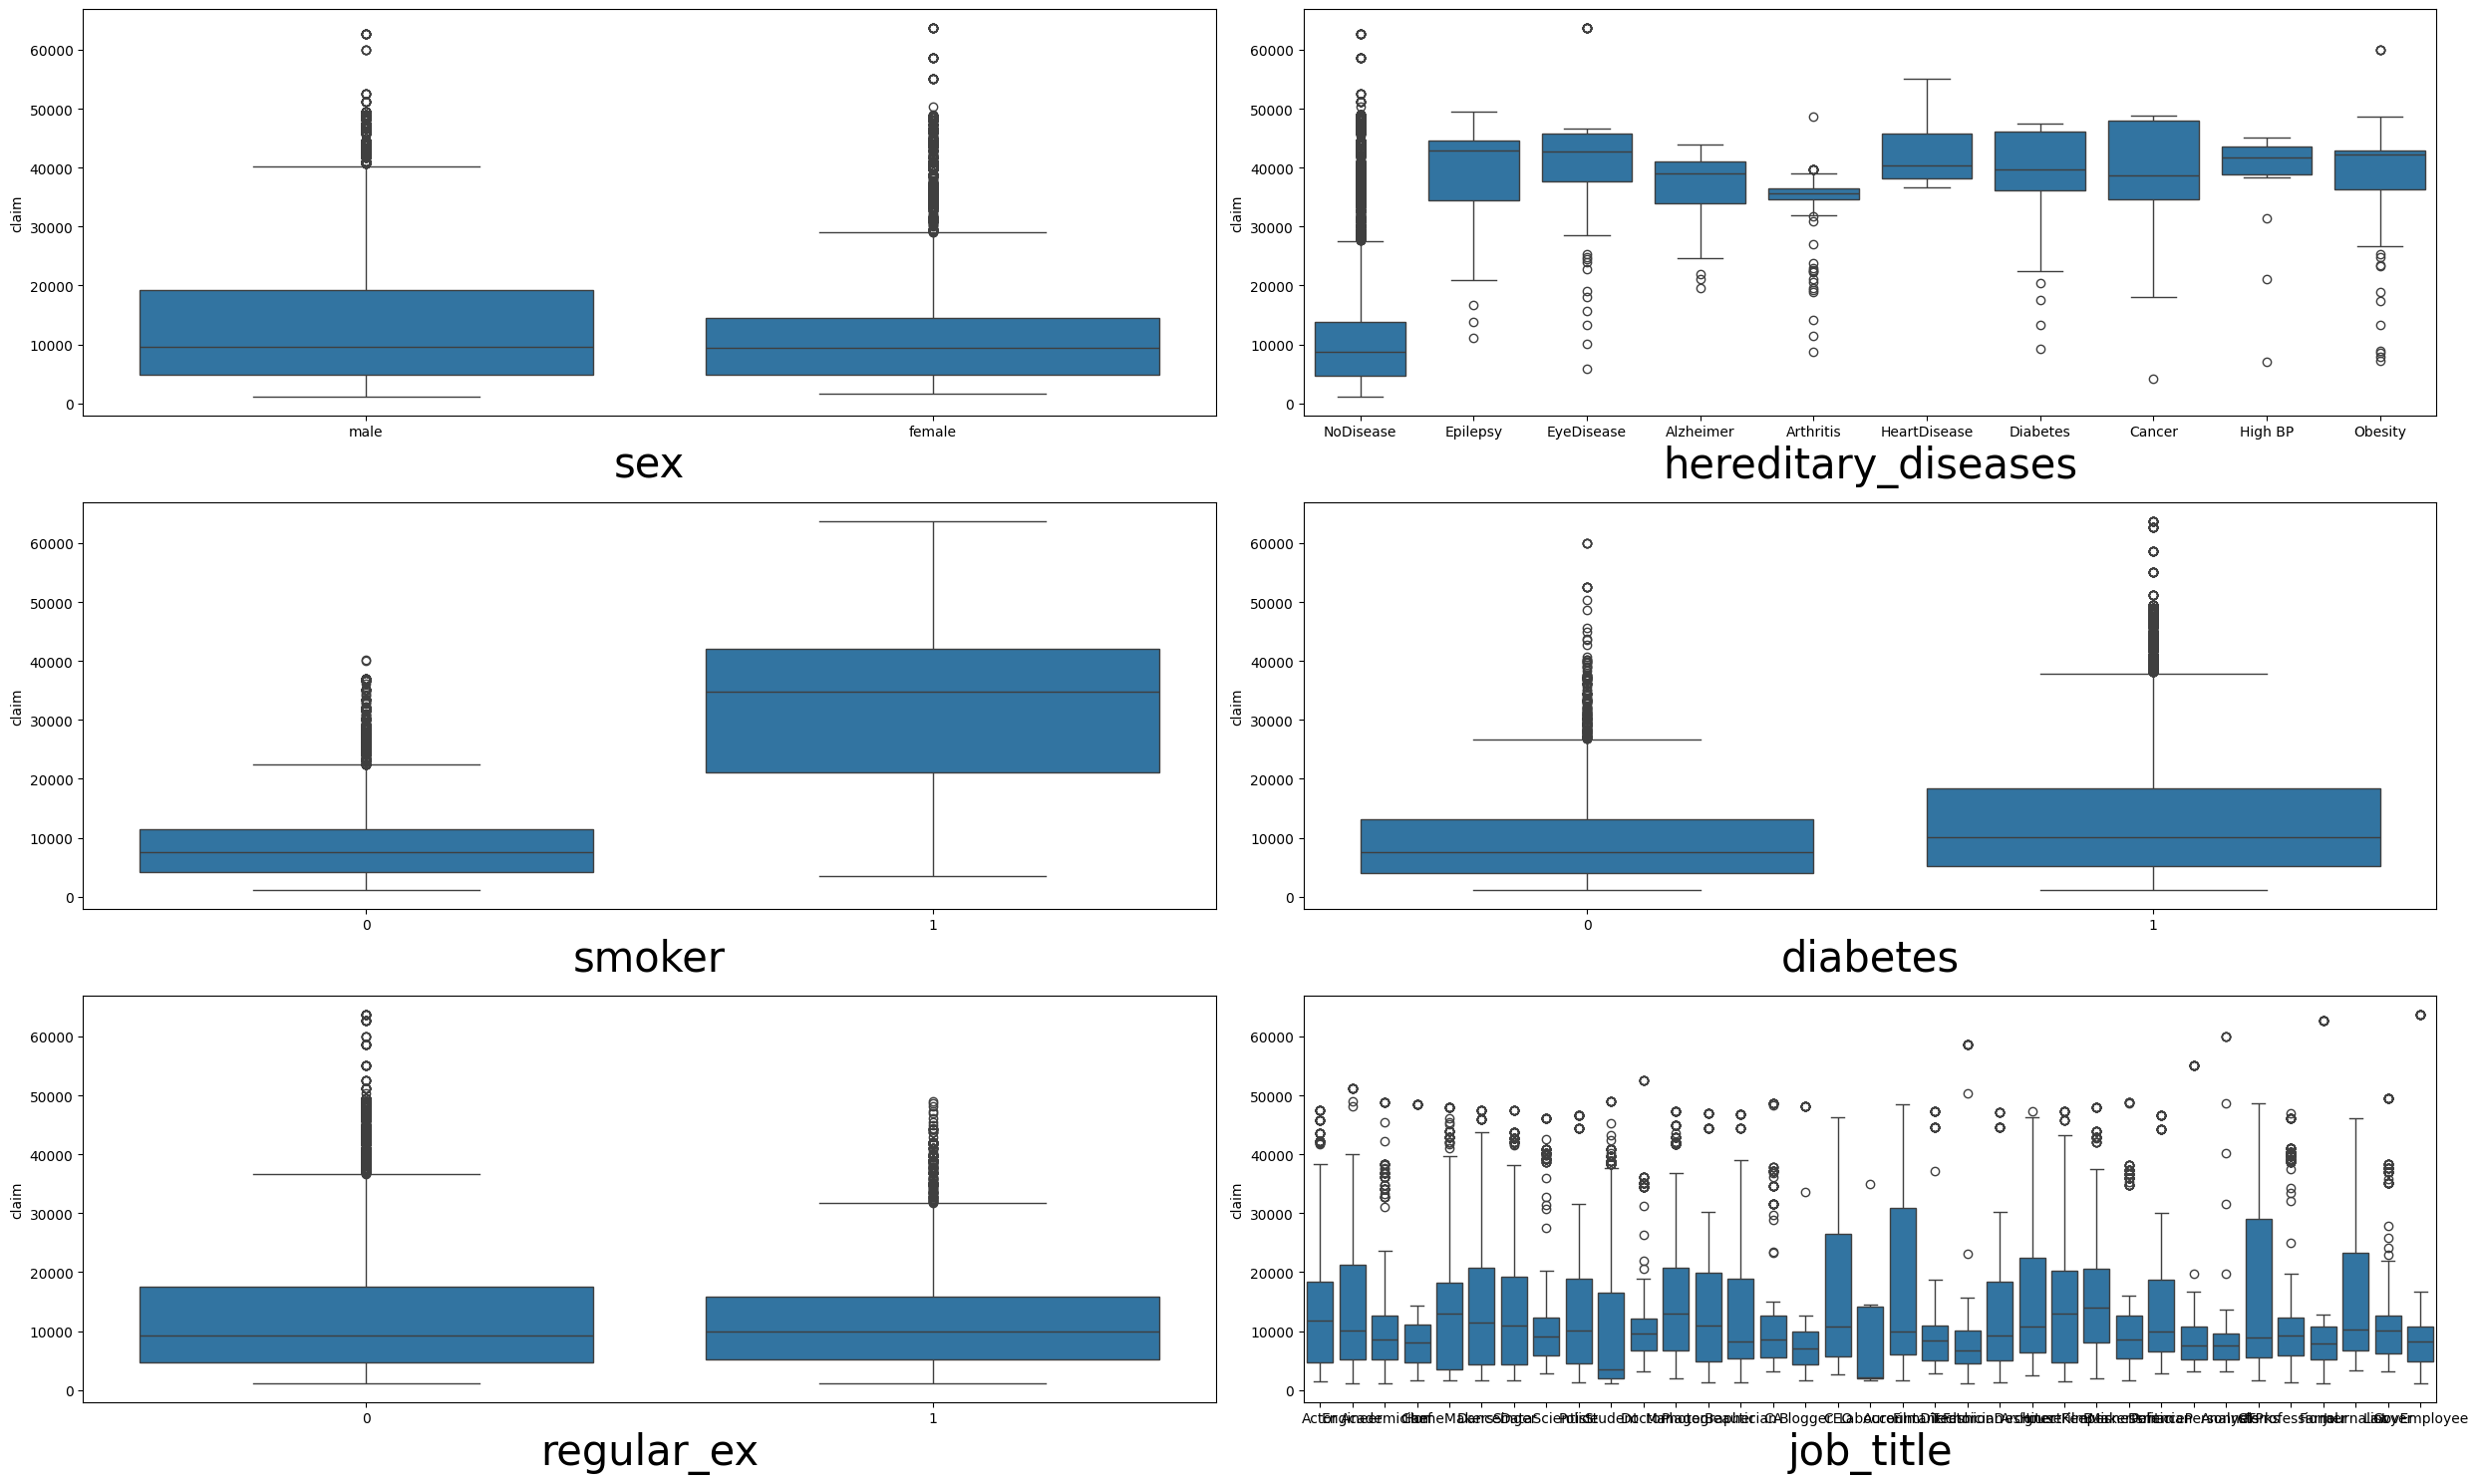

In [ ]:
# plot the boxplot for each categorical variable
# create subplots using subplots()
# 6 subplots in 3 rows and 2 columns
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 2, figsize=(25, 15))

# plot a boxplot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):

    # x: variable on x-axis
    # y: variable in y-axis
    # data: dataframe to be used
    # ax: specifies the axes object to draw the plot onto
    boxplt = sns.boxplot(x=variable, y='claim', data=df_insurance, ax=subplot)

    # set the x-axis labels
    # fontsize = 30: sets the font size to 30
    boxplt.set_xlabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()
plt.tight_layout()

# display the plot
plt.show()

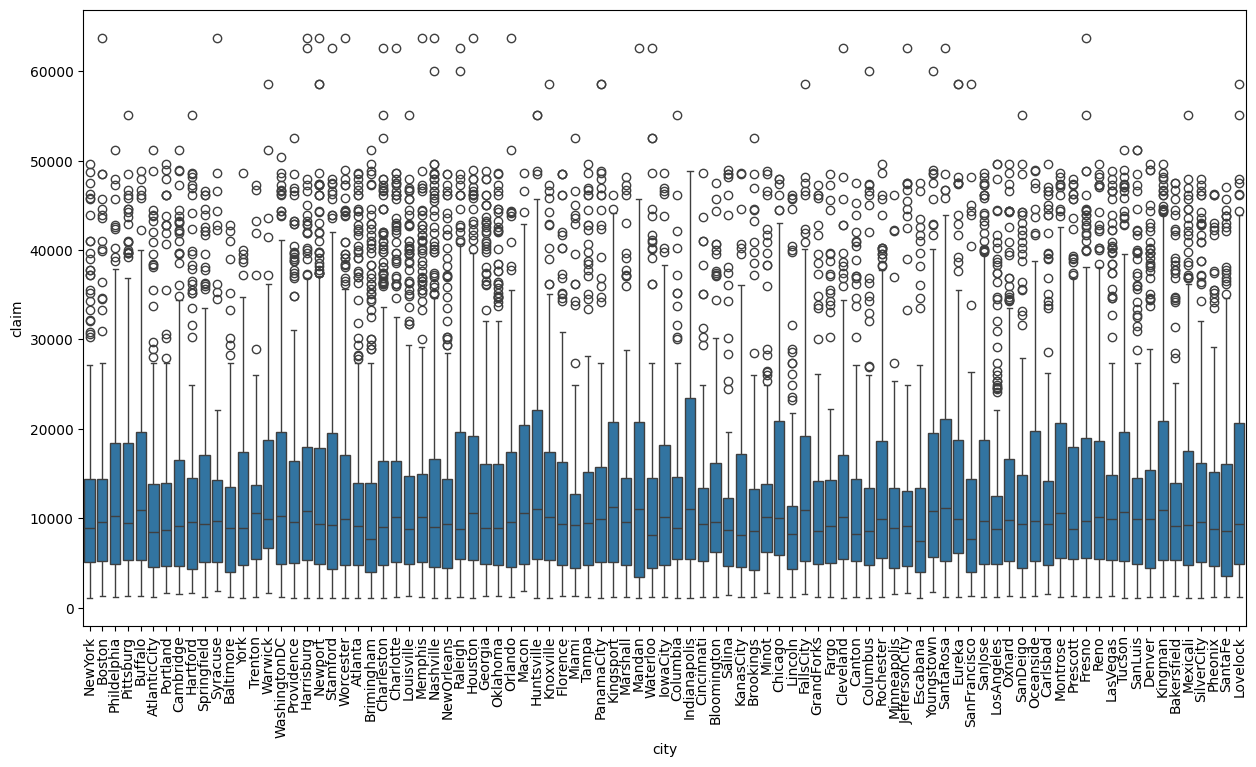

In [ ]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the boxplot for categorical variable 'city'
# x: variable on x-axis
# y: variable in y-axis
# data: dataframe to be used
ax = sns.boxplot(x=df_insurance["city"], y=df_insurance['claim'], data=df_insurance)

# set the x-axis labels
# rotation: rotate the the x-axis ticks by 90˚
# fontsize = 30: sets the font size to 10
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 10)

# display the plot
plt.show()

 Feature Engineering

In [ ]:
# create a region column and combine the north-east cities
df_insurance['region'] = df_insurance['city'].replace(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
                                                       'AtlanticCity','Portland', 'Cambridge', 'Hartford',
                                                       'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton',
                                                       'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg',
                                                       'Newport', 'Stamford', 'Worcester'],
                                                      'North-East')

In [ ]:
# combine all the southern cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
                                                         'Louisville', 'Memphis', 'Nashville', 'NewOrleans',
                                                         'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando',
                                                         'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami',
                                                         'Tampa', 'PanamaCity', 'Kingsport', 'Marshall'],
                                                         'Southern')

In [ ]:
# combine all the mid-west cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Mandan', 'Waterloo', 'IowaCity', 'Columbia',
                                                         'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
                                                         'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
                                                         'FallsCity', 'GrandForks', 'Fargo', 'Cleveland',
                                                         'Canton', 'Columbus', 'Rochester', 'Minneapolis',
                                                         'JeffersonCity', 'Escabana','Youngstown'],
                                                         'Mid-West')

In [ ]:
# combine all the western cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose',
                                                         'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside',
                                                         'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
                                                         'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
                                                         'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix',
                                                         'SantaFe', 'Lovelock'],
                                                         'West')

In [ ]:
# check the unique values of the region using 'unique()'
df_insurance['region'].unique()

array(['North-East', 'Southern', 'Mid-West', 'West'], dtype=object)

In [ ]:
df_insurance['region'].value_counts()

,count
region,
Southern,4444
West,4273
North-East,3471
Mid-West,2812


In [ ]:
# drop the 'city' variable from the dataset using drop()
# axis=1: specifies that the column `city` is to be dropped
df_insurance = df_insurance.drop(['city'], axis=1)

In [ ]:
# display the top 5 rows of the dataframe
df_insurance.head()

In [ ]:
# set figure size
plt.figure(figsize=(15,8))

# boxplot of claim against region
# x: specifies the data on x axis
# y: specifies the data on y axis
# data: specifies the dataframe to be used
ax = sns.boxplot(x="region", y="claim", data=df_insurance)

# rotate labels using set_ticklabels
# labels: specify the tick labels to be used
# rotation: the angle by which tick labels should be rotated
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# show the plot
plt.show()

 Discover Outliers

In [ ]:
# set the plot size
plt.rcParams['figure.figsize']=(15,8)

# create a boxplot for all numeric features
# column: selects the specified columns
df_numeric_features.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])

# to display the plot
plt.show()

In [ ]:
# calculate interquartile range

# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable
# axis=1: specifies that the labels are dropped from the columns
Q1 = df_numeric_features.drop(['claim'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable
# axis=1: specifies that the labels are dropped from the columns
Q3 = df_numeric_features.drop(['claim'], axis=1).quantile(0.75)

# calculate of interquartile range
IQR = Q3 - Q1

# print the IQR values for numeric variables

In [ ]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# |: bitwise operator OR in python
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (use "0" for 'index')
outliers = (df_numeric_features.drop(['claim'], axis=1) < (Q1 - 1.5 * IQR)) | (df_numeric_features.drop(['claim'], axis=1) > (Q3 + 1.5 * IQR))

# Filter out the outliers from the original DataFrame
df_insurance = df_insurance[~outliers.any(axis=1)]

In [ ]:
# check the shape of data using shape
df_insurance.shape

In [ ]:
# set figure size
plt.rcParams['figure.figsize']=(15,8)

# recheck for outliers
# column: selects the specifies columns
df_insurance.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])

# display only the plot
plt.show()

 Recheck the Correlation

In [ ]:
# filter the numerical features in the dataset
# include=np.number: selects the numeric features
df_numeric_features = df_insurance.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

In [ ]:
# generate the correlation matrix
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

In [ ]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15})

# specify name of the plot
plt.title('Correlation between numeric features')

# display the plot
plt.show()

 Prepare the Data

Check for Normality

In [ ]:
# check the distribution of target variable using hist()
df_insurance.claim.hist()

# display the plot
plt.show()

In [ ]:
# normality test using jarque_bera()
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(df_insurance["claim"])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

In [ ]:
# log transformation for normality using np.log()
df_insurance['log_claim'] = np.log(df_insurance['claim'])

# display first 5 rows of the data
df_insurance.head()

In [ ]:
# recheck for normality
# plot the histogram using hist
df_insurance.log_claim.hist()

# display the plot
plt.show()

In [ ]:
# recheck normality by Jarque-Bera test
# the test returns the the test statistics and the p-value of the test
statn, pv = jarque_bera(df_insurance['log_claim'])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

 One-Way Anova

In [ ]:
# perform one way anova for sex on claim using f_oneway()
f_oneway(df_insurance['claim'][df_insurance['sex'] == 'male'],
             df_insurance['claim'][df_insurance['sex'] == 'female'])

 Dummy Encoding of Categorical Variables

In [ ]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df_insurance.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

In [ ]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df_insurance.select_dtypes(include=[object])

# display categorical features
df_categoric_features.columns

In [ ]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_categoric_features.columns.values:

    # for a feature create dummy variables using get_dummies()
    # prefix: specify the prefix before creating the dummy variable
    # "drop_first=True": creates 'n-1' dummy variables
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)

    # concatenate the categoric features with dummy variables using concat()
    # axis=1: specifies that the concatenation is column wise
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)

    # drop the orginal categorical variable from the dataframe
    # axis=1: specifies that the column is to be dropped
    # inplace: makes permanent changes in the dataframe
    df_categoric_features.drop([col], axis=1, inplace=True)

In [ ]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_insurance_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)

# display data with dummy variables
df_insurance_dummy.head()

# 5.LINEAR REGRESSION(OLS)

Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

In [ ]:
# add the intercept column to the dataset
df_insurance_dummy = sm.add_constant(df_insurance_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_insurance_dummy.drop(['claim','log_claim'], axis=1)

# extract the target variable from the data set
y = df_insurance_dummy[['log_claim','claim']]

# Convert boolean columns to integers
X = X.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

In [ ]:
# build a full model using OLS()
# consider the log of claim
linreg_full_model_withlog = sm.OLS(y_train["log_claim"], X_train).fit()

# print the summary output
print(linreg_full_model_withlog.summary())

In [ ]:
# predict the 'log_claim' using predict()
linreg_full_model_withlog_predictions = linreg_full_model_withlog.predict(X_test)

In [ ]:
# take the exponential of predictions using np.exp()
predicted_claim = np.exp(linreg_full_model_withlog_predictions)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

In [ ]:
# calculate rmse using rmse()
linreg_full_model_withlog_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_full_model_withlog_rsquared = linreg_full_model_withlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withlog_rsquared_adj = linreg_full_model_withlog.rsquared_adj

In [ ]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

# print the score card
score_card

In [ ]:
# compile the required information
linreg_full_model_withlog_metrics = pd.DataFrame([{
    'Model_Name': "Linreg full model with log of target variable",
    'RMSE': linreg_full_model_withlog_rmse,
    'R-Squared': linreg_full_model_withlog_rsquared,
    'Adj. R-Squared': linreg_full_model_withlog_rsquared_adj
}])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_full_model_withlog_metrics], ignore_index=True)

# print the result table
score_card

Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

In [ ]:
# ordinary least squares regression
# we use the train and test sets from the previous model
# however, now we shall build a model using the variable 'claim'

# build a full model using OLS()
linreg_full_model_withoutlog = sm.OLS(y_train['claim'], X_train).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

In [ ]:
# calculate the p-values for all the variables
# create a dataframe using pd.DataFrame()
# columns: specifies the column names
linreg_full_model_withoutlog_pvalues = pd.DataFrame(linreg_full_model_withoutlog.pvalues, columns=["P-Value"])

# print the values
linreg_full_model_withoutlog_pvalues

In [ ]:
# select insignificant variables
insignificant_variables = linreg_full_model_withoutlog_pvalues[
                                                        linreg_full_model_withoutlog_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_var = insignificant_variables.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
insigni_var

In [ ]:
# predict the claim using predict()
predicted_claim = linreg_full_model_withoutlog.predict(X_test)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

In [ ]:
# calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj

In [ ]:
# Compile the required information into a DataFrame
linreg_full_model_withoutlog_metrics = pd.DataFrame([{
    'Model_Name': "Linreg full model without log of target variable",
    'RMSE': linreg_full_model_withoutlog_rmse,
    'R-Squared': linreg_full_model_withoutlog_rsquared,
    'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj
}])

# Concatenate the new row to the score_card DataFrame
score_card = pd.concat([score_card, linreg_full_model_withoutlog_metrics], ignore_index=True)

# Print the result table
score_card

Fine Tune Linear Regression Model (OLS)

Linear Regression after Removing Insignificant Variable (OLS)

In [ ]:
# drop the insignificant variables
X_significant = df_insurance.drop(["sex","job_title","region","claim","log_claim"], axis=1)

In [ ]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_significant_categoric_features = X_significant.select_dtypes(include=[object])

# display categorical features
df_significant_categoric_features.columns

In [ ]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_significant_categoric_features.columns.values:

    # for a feature create dummy variables using get_dummies()
    # prefix: specify the prefix before creating the dummy variable
    # "drop_first=True": creates 'n-1' dummy variables
    dummy_encoded_variables = pd.get_dummies(df_significant_categoric_features[col], prefix=col, drop_first=True)

    # concatenate the categoric features with dummy variables using concat()
    # axis=1: specifies that the concatenation is column wise
    df_significant_categoric_features = pd.concat([df_significant_categoric_features, dummy_encoded_variables],axis=1)

    # drop the orginal categorical variable from the dataframe
    # axis=1: specifies that the column is to be dropped
    # inplace: makes permanent changes in the dataframe
    df_significant_categoric_features.drop([col], axis=1, inplace=True)

In [ ]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_insurance_significant = pd.concat([df_numeric_features, df_significant_categoric_features], axis=1)

# display data with dummy variables
df_insurance_significant.head()

In [ ]:
# add the intercept column to the dataset
df_insurance_significant = sm.add_constant(df_insurance_significant)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_insurance_significant.drop(['claim','log_claim'], axis=1)

# extract the target variable from the data set
y = df_insurance_significant[['log_claim','claim']]

# Convert boolean columns to integers
X = X.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_significant, X_test_significant, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

In [ ]:
# build a full model with significant variables using OLS()
linreg_model_with_significant_var = sm.OLS(y_train['claim'], X_train_significant).fit()

# to print the summary output
print(linreg_model_with_significant_var.summary())

In [ ]:
# predict the 'claim' using predict()
predicted_claim = linreg_model_with_significant_var.predict(X_test_significant)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

In [ ]:
# calculate rmse using rmse()
linreg_model_with_significant_var_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_model_with_significant_var_rsquared = linreg_model_with_significant_var.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_var_rsquared_adj = linreg_model_with_significant_var.rsquared_adj

In [ ]:
# compile the required information
linreg_model_with_significant_var_metrics = pd.DataFrame([{
                     'Model_Name': "Linreg full model with significant variables",
                     'RMSE': linreg_model_with_significant_var_rmse,
                     'R-Squared': linreg_model_with_significant_var_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_var_rsquared_adj
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_model_with_significant_var_metrics], ignore_index=True)

# print the result table
score_card

Check the Assumptions of the Linear Regression

Detecting Autocorrelation

The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation

From the summary output in section 5.3.1, we see that the Durbin-Watson static is 1.980

Hence we can conclude that there is no autocorrelation

 Detecting Heteroskedasticity

In [ ]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using het_breushpagan()
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(linreg_model_with_significant_var.resid, linreg_model_with_significant_var.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
lzip(name, test)

Linearity of Residuals

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the number of rows and columns for the subplot grid
n_plots = len(X_train_significant.columns) - 1  # Excluding intercept
n_cols = 5  # Number of columns in the grid
n_rows = (n_plots // n_cols) + int(n_plots % n_cols > 0)  # Number of rows

# Create a subplot grid with the calculated number of rows and columns
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Create scatter plots for residuals vs. each independent variable
for variable, subplot in zip(X_train_significant.columns[1:], ax):
    sns.scatterplot(x=X_train_significant[variable], y=linreg_model_with_significant_var.resid, ax=subplot)
    subplot.set_title(f'Residuals vs {variable}')
    subplot.set_xlabel(variable)
    subplot.set_ylabel('Residuals')

# Hide any unused subplots
for i in range(n_plots, len(ax)):
    fig.delaxes(ax[i])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Normality of Residuals

In [ ]:
# calculate fitted values
fitted_vals = linreg_model_with_significant_var.predict(X_test_significant)

# calculate residuals
resids = actual_claim - fitted_vals

# create subplots using subplots() such that there is one row having one plot
# 'figsize' sets the figure size
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# plot the probability plot to check the normality of the residuals
# plot: if specified plots the least squares fit
stats.probplot(resids, plot=plt)

# set the marker type using the set_marker() parameter
# access the line object from the axes object using ax.get_lines()
# then, the properties can be changed accordingly
# set the marker to 'o' to use circles as points
ax.get_lines()[0].set_marker('o')

# set the marker size using the set_markersize() parameter
# set the marker size to 5
ax.get_lines()[0].set_markersize(5.0)

# set the color of the trend line using set_markerfacecolor()
# set color of the trend line to red by passing 'r' to the set_markerfacecolor
ax.get_lines()[0].set_markerfacecolor('r')

# set the trend line width
ax.get_lines()[1].set_linewidth(4.0)

# display the plot
plt.show()

In [ ]:
# check the mean of the residual
linreg_model_with_significant_var.resid.mean()

In [ ]:
# normality test using 'jarque_bera'
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(resids)

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

 Linear Regression after Removing Insignificant Variable (OLS) - Scaled Data

In [ ]:
# scale the numeric variables
# apply(): applies the operaction passed to each feature in 'df_numeric_features'
# lambda(): lambda functions are anonymous, i.e. to say they have no names
# the lambda function scales the data
df_num_scaled = df_numeric_features.apply(lambda rec: (rec - rec.mean()) / rec.std())

# create a dataframe
# axis=1: specifies that the concatenation is column wise
df_insurance_scaled = pd.concat([df_num_scaled, df_categoric_features], axis = 1)

# add constant to the data
df_insurance_scaled =sm.add_constant(df_insurance_scaled)

In [ ]:
# on doing the predictions to compute RMSE the we need to unscale the predictions
# so we store the original mean and standard deviation of the data
# store the mean as 'mean_numeric_features'
mean_numeric_features = df_numeric_features.mean()

# store the standard deviation as 'std_numeric_features'
std_numeric_features = df_numeric_features.std()

In [ ]:
# separate the independent and dependent variables
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X = df_insurance_scaled.drop(['claim','log_claim'], axis=1)

# extract the target variable from the train set
y = df_insurance_scaled['claim']

# Convert boolean columns to integers
X = X.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for

# print dimension of predictors train set
print("The shape of X_train_scaled is:",X_train_scaled.shape)

# print dimension of predictors test set
print("The shape of X_test_scaled is:",X_test_scaled.shape)

# print dimension of target train set
print("The shape of y_train_scaled is:",y_train_scaled.shape)

# print dimension of target test set
print("The shape of y_test_scaled is:",y_test_scaled.shape)

In [ ]:
# consider the significant variable in the training set
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X_train_scaled_significant = X_train_scaled.drop(insigni_var, axis=1)

# consider the significant variable in the training set
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X_test_scaled_significant = X_test_scaled.drop(insigni_var, axis=1)

In [ ]:
# ordinary least squares regression
# build a full model with significant scaled variables using OLS()
linreg_model_with_significant_scaled_vars = sm.OLS(y_train_scaled,X_train_scaled_significant).fit()

# to print the summary output
print(linreg_model_with_significant_scaled_vars.summary())

This model explains 76.4% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.982 and indicates that the is no autocorrelation. The Condition Number is 30.4 suggests that there is no collinearity

In [ ]:
# predict the 'claim' using predict()
predicted_claim = linreg_model_with_significant_scaled_vars.predict(X_test_scaled_significant)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

In [ ]:
# calculate rmse using rmse()
linreg_model_with_significant_scaled_vars_rmse = rmse(actual_claim, y_pred_unscaled)

# calculate R-squared using rsquared
linreg_model_with_significant_scaled_vars_rsquared = linreg_model_with_significant_scaled_vars.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_scaled_vars_rsquared_adj = linreg_model_with_significant_scaled_vars.rsquared_adj

In [ ]:
# compile the required information
linreg_model_with_significant_scaled_vars_metrics = pd.DataFrame([{
                     'Model_Name': "Linreg with scaled significant variables",
                     'RMSE': linreg_model_with_significant_scaled_vars_rmse,
                     'R-Squared': linreg_model_with_significant_scaled_vars_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_scaled_vars_rsquared_adj
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_model_with_significant_scaled_vars_metrics], ignore_index = True)

# print the result table
score_card

Linear Regression with Interaction (OLS)

In [ ]:
 #create a copy of the entire dataset to add the interaction effect using copy()
df_insurance_interaction = df_insurance_dummy.copy()

# add the interaction variable
df_insurance_interaction['bmi*smoker'] = df_insurance_interaction['bmi']*df_insurance_interaction['smoker_1']

# print the data with interaction
df_insurance_interaction.head()

In [ ]:
# separate the independent and dependent variables
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X = df_insurance_interaction.drop(['claim','log_claim'], axis=1)

# extract the target variable from the train set
y = df_insurance_interaction['claim']

# Convert boolean columns to integers
X = X.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

# check the dimensions of the train & test subset for

# print dimension of predictors train set
print("The shape of X_train_interaction is:",X_train_interaction.shape)

# print dimension of predictors test set
print("The shape of X_test_interaction is:",X_test_interaction.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

In [ ]:
# building a full model with an interaction term using OLS()
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()

# print the summary output
print(linreg_with_interaction.summary())

In [ ]:
# predict the 'claim' using predict()
predicted_claim = linreg_with_interaction.predict(X_test_interaction)

# extract the 'claim' values from the test data
actual_claim = y_test

In [ ]:
# calculate rmse using rmse()
linreg_with_interaction_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_with_interaction_rsquared = linreg_with_interaction.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj

In [ ]:
# compile the required information
linreg_with_interaction_metrics = pd.DataFrame([{
                     'Model_Name': "linreg_with_interaction",
                     'RMSE': linreg_with_interaction_rmse,
                     'R-Squared': linreg_with_interaction_rsquared,
                     'Adj. R-Squared': linreg_with_interaction_rsquared_adj
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_with_interaction_metrics], ignore_index = True)

# print the result table
score_card

# 6.Regularization (OLS)

Ridge Regression (OLS)

In [ ]:
# compile the column names of the output dataframe
# add the names of metrics used for comparing the models
# these metrics are used for both lasso and ridge regression

# create list of variable names
col = list(X_train_scaled.columns)

# add 'Sum of square of Residuals' to the list
col.append('ssr')

# add 'R squared' to the list
col.append('R squared')

# add 'Adj. R squared' to the list
col.append('Adj. R squared')

# add 'Root mean Squared Error' to the list
col.append('RMSE')

In [ ]:
# build a OLS model using OLS()
ridge_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted ridge model
results_fu = ridge_regression.fit()

In [ ]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be 0.0001, 0.1001, 0.2001, 0.3001, 0.4001, 0.5001 and 10.0001
for n in np.arange(0.0001,10.1, 0.1).tolist():

    # fit a rigde regression to the linear model built using OLS
    # L1_wt=0: conducts ridge regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)

    # fit the model
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=ridge_regression,
                                             params=results_fr.params,
                                             normalized_cov_params=ridge_regression.normalized_cov_params)

    # compute the rmse
    # calling the test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)

    # obtain the rmse
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)

    # compile the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]

    # append the empty list
    frames.append(np.append(results_fr.params, list_metric))

    # converting the list to a dataframe.
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe
df_params.index=np.arange(0.0001, 10.1, 0.1).tolist()

# add the first column name alpha to the data frame.
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display the output
df_params

In [ ]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be 0.0001, 0.1001, 0.2001, 0.3001, 0.4001, 0.5001 and 10.0001
for n in np.arange(0.0001,10.1, 0.1).tolist():

    # fit a rigde regression to the linear model built using OLS
    # L1_wt=0: conducts ridge regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)

    # fit the model
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=ridge_regression,
                                             params=results_fr.params,
                                             normalized_cov_params=ridge_regression.normalized_cov_params)

    # compute the rmse
    # calling the test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)

    # obtain the rmse
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)

    # compile the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]

    # append the empty list
    frames.append(np.append(results_fr.params, list_metric))

    # converting the list to a dataframe.
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe
df_params.index=np.arange(0.0001, 10.1, 0.1).tolist()

# add the first column name alpha to the data frame.
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display the output
df_params

In [ ]:
# call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

In [ ]:
# find the alpha value for which RMSE is minimum
# from the column EMSE of df_params obtain the minimum value of RMSE
# .index.tolist(): gets the corresponding index value, i.e. the alpha value
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

In [ ]:
# check for zeros in the above coefficients table
# axis=1: specifies that the apply() is to be applies column wise
df_params.apply(lambda x: sum(x.values==0),axis=1)

In [ ]:
# build a ridge model for the desired alpha
# L1_wt=0: conducts ridge regression
# alpha: specifies the alpha value
# start_params: starting values for patameters
results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=0.0001, start_params=results_fu.params)

# fit the model
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
ridge_regression_best = sm.regression.linear_model.OLSResults(model = ridge_regression,
                                        params=results_fr.params,
                                        normalized_cov_params=ridge_regression.normalized_cov_params)

# print the summary output
print (ridge_regression_best.summary())

In [ ]:
# predict the scaled claim using predict()
predicted_claim = ridge_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test

In [ ]:
# calculate rmse using rmse()
ridge_regression_best_rmse = rmse(actual_claim, y_pred_unscaled)

# calculate R-squared using rsquared
ridge_regression_best_rsquared = ridge_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
ridge_regression_best_rsquared_adj = ridge_regression_best.rsquared_adj

In [ ]:
# compile the required information
ridge_regression_best_metrics = pd.DataFrame([{
                     'Model_Name': "Ridge Regression",
                     'RMSE': ridge_regression_best_rmse,
                     'R-Squared': ridge_regression_best_rsquared,
                     'Adj. R-Squared': ridge_regression_best_rsquared_adj
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,ridge_regression_best_metrics], ignore_index = True)

# print the result table
score_card

Lasso Regression (OLS)

In [ ]:
# we use the scaled data
# build a OLS model using OLS()
lasso_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted lasso model
results_fu = lasso_regression.fit()

In [ ]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be  0.0001, 0.0002 ,0.0003, 0.0004 ,0.0005 to 0.0199
for n in np.arange(0.0001, 0.02, 0.0001).tolist():

    # fit a lasso regression to the linear model built using OLS
    # L1_wt=1: conducts lasso regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)

    # fit the model
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=lasso_regression,
                                                params=results_fr.params,
                                                normalized_cov_params=lasso_regression.normalized_cov_params)

    # calculate the rmse
    # predict the claim on test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)

    # obtain the rmse
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)

    # compile the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]

    # append the empty list
    frames.append(np.append(results_fr.params, list_metric))

    # convert the list to a dataframe
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe
df_params.index=np.arange(0.0001, 0.02, 0.0001).tolist()

# add the first column name alpha to the data frame
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display output
df_params

In [ ]:
# call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

In [ ]:
# find the alpha value for which RMSE is minimum
# from the column EMSE of df_params obtain the minimum value of RMSE
# .index.tolist(): gets the corresponding index value, i.e. the alpha value
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

In [ ]:
# check for zeros in the above coefficients table
df_params.apply(lambda x: sum(x.values==0),axis=1)

In [ ]:
# fit the lasso regression model
# L1_wt=1: conducts lasso regression
# alpha: specifies the alpha value
# start_params: starting values for patameters
results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=0.0001, start_params=results_fu.params)

# fit the lasso regression
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
lasso_regression_best = sm.regression.linear_model.OLSResults(model=lasso_regression,
                                              params=results_fr.params,
                                              normalized_cov_params=lasso_regression.normalized_cov_params)

# print the summary output
print (lasso_regression_best.summary())

In [ ]:
# predict the 'claim' using predict()
predicted_claim = lasso_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test

In [ ]:
# calculate rmse using rmse()
lasso_regression_best_rmse = rmse(actual_claim, y_pred_unscaled)

# calculate R-squared using rsquared
lasso_regression_best_rsquared = lasso_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
lasso_regression_best_rsquared_adj = lasso_regression_best.rsquared_adj

In [ ]:
# compile the required information
lasso_regression_best_metrics = pd.DataFrame([{
                     'Model_Name': "Lasso Regression",
                     'RMSE': lasso_regression_best_rmse,
                     'R-Squared': lasso_regression_best_rsquared,
                     'Adj. R-Squared': lasso_regression_best_rsquared_adj
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,lasso_regression_best_metrics], ignore_index = True)

# print the result table
score_card

Elastic Net Regression (OLS)

In [ ]:
# build a OLS model using OLS()
elastic_net_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted elastic net model
results_fu = elastic_net_regression.fit()

In [ ]:
# normalize the data which is required for elastic net
elastic = ElasticNet()

# use gridsearchCV to find best penalty term
# estimator: the method used to estimate the parameter of regression
# param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values
# scoring: a single string or a callable to evaluate the predictions on the test set
# n_jobs: number of jobs to run in parallel
# refit: refit an estimator using the best found parameters on the whole dataset
# CV: determines the cross-validation splitting strategy
search = GridSearchCV(estimator=elastic,
                      param_grid={'l1_ratio':[.2,.4,.6,.8]},
                      scoring='neg_mean_squared_error',
                      n_jobs=1,
                      refit=True,
                      cv=10)

In [ ]:
# fit the model to get best parameter
search.fit(X_train_scaled, y_train_scaled)

# get best parameter
search.best_params_

In [ ]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be 0.0001, 0.0101, 0.0201 and 1.9901
for n in np.arange(0.0001, 1.5, 0.01).tolist():

    # fitting a elastic net regression to the elastic net model built using OLS
    # the l1_ratio is the same as l1_wt in the below function
    # L1_wt=0.8: conducts elastic net regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = elastic_net_regression.fit_regularized(method='elastic_net',
                                                        L1_wt= 0.2,
                                                        alpha=n,
                                                        start_params=results_fu.params)

    # obtaining the parameters of the fitted model
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=elastic_net_regression,
                                    params=results_fr.params,
                                    normalized_cov_params=elastic_net_regression.normalized_cov_params)

    # calculate rmse
    # call the test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)

    # obtaining the rmse
    results_fr_fit_rmse = rmse(y_test, results_fr_fit_predictions)

    # compiling the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]

    # appending the empty list
    frames.append(np.append(results_fr.params, list_metric))

    # converting the list to a dataframe
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe
df_params.index=np.arange(0.0001, 1.5, 0.01).tolist()

# add the first column name alpha to the data frame
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display output
df_params

In [ ]:
# to call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

In [ ]:
# find the alpha value for which RMSE is minimum
# from the column EMSE of df_params obtain the minimum value of RMSE
# .index.tolist(): gets the corresponding index value, i.e. the alpha value
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

In [ ]:
# check for zeros in the above coefficients table
df_params.apply(lambda x: sum(x.values==0),axis=1)

In [ ]:
# fit the elastic net regression model
results_fr = elastic_net_regression.fit_regularized(method='elastic_net',
                                                    L1_wt=0.2,
                                                    alpha= 0.0001,
                                                    start_params=results_fu.params)

# fit elastic net regression
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
elastic_net_regression_best = sm.regression.linear_model.OLSResults(model=elastic_net_regression,
                                              params=results_fr.params,
                                              normalized_cov_params=elastic_net_regression.normalized_cov_params)

# print the summary output
print (elastic_net_regression_best.summary())

In [ ]:
# predict the 'claim' using predict()
predicted_claim = elastic_net_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_claim * std_numeric_features.claim) + mean_numeric_features.claim

# extract the 'claim' values from the test data
actual_claim = y_test

In [ ]:
# calculate rmse using rmse()
elastic_net_regression_best_rmse = rmse(actual_claim, y_pred_unscaled)

# calculate R-squared using rsquared
elastic_net_regression_best_rsquared = elastic_net_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
elastic_net_regression_best_rsquared_adj = elastic_net_regression_best.rsquared_adj

In [ ]:
# compile the required information
elastic_net_regression_best_metrics = pd.DataFrame([{
                     'Model_Name': "Elastic net Regression",
                     'RMSE': elastic_net_regression_best_rmse,
                     'R-Squared': elastic_net_regression_best_rsquared,
                     'Adj. R-Squared': elastic_net_regression_best_rsquared_adj
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,elastic_net_regression_best_metrics], ignore_index = True)

# print the result table
score_card

# 7.STOCHASTIC GRADIENT DESCENT - SGD

 Linear Regression with SGD

In [ ]:
# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# build the model
linreg_with_SGD = SGDRegressor()

# we fit our model with train data
linreg_with_SGD = linreg_with_SGD.fit(X_train, y_train)

In [ ]:
# we use predict() to predict our values
linreg_with_SGD_predictions = linreg_with_SGD.predict(X_test)

In [ ]:
# calculate mse
linreg_SGD_mse = mean_squared_error(y_test, linreg_with_SGD_predictions)

# calculate rmse
linreg_SGD_rmse = np.sqrt(linreg_SGD_mse)

# calculate R-squared
linreg_SGD_r_squared = r2_score(y_test, linreg_with_SGD_predictions)

# calculate Adjusted R-squared
linreg_SGD_adjusted_r_squared = 1 - (1-linreg_SGD_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [ ]:
# compile the required information
linreg_full_model_SGD = pd.DataFrame([{
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_rmse ,
                     'R-Squared': linreg_SGD_r_squared,
                     'Adj. R-Squared': linreg_SGD_adjusted_r_squared
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_full_model_SGD], ignore_index = True)

# print the result table
score_card

Linear Regression with SGD using GridSearchCV

In [ ]:
# to supress the warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import gridsearchcv from sklearn to optimize best parameter
from sklearn.model_selection import GridSearchCV

# Grid search

# alpha is regularization term usually in the range 10.0**-np.arange(1,7).
# this will generate different alpha values like 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06

# loss="squared_loss": Ordinary least squares,

# "l2": L2 norm penalty on coefficients (ridge regression),
# "l1": L1 norm penalty on coefficients(lasso regression), "elasticnet": Convex combination of L2 and L1

# The learning rate can be either constant or gradually decaying

param_grid = { 'alpha': 10.0 ** -np.arange(1, 7),

               'loss': ['squared_error'],

               'penalty': ['l2', 'l1', 'elasticnet'],

               'learning_rate': ['constant', 'optimal', 'invscaling']
}

# using sklearn’s GridSearchCV, we define our grid of parameters to search over and then run the grid search
clf = GridSearchCV(estimator=linreg_with_SGD, param_grid=param_grid)

# fit the model on train data
clf.fit(X_train, y_train)

In [ ]:
# print the best parameters
# print best alpha value
print('Best alpha:', clf.best_estimator_.alpha)

# print best tolerance
print('Best tol:', clf.best_estimator_.tol)

# print best starting rate (Use eta0 to specify the starting learning)
print('Best eta0:', clf.best_estimator_.eta0)

# print best learning rate
print('Best learning rate:', clf.best_estimator_.learning_rate)

In [ ]:
# build the model using best parameters
# squared_loss: ordinary least squares loss
# 'eta0': specify the starting learning
linreg_SGD_using_best_parameter = SGDRegressor(alpha=1e-06,
                                               eta0=0.01,
                                               learning_rate='optimal')

# fit the SGD model using best parameter
linreg_SGD_using_best_parameter.fit(X_train,y_train)

In [ ]:
# predict the values on test data using predict
linreg_SGD_using_best_parameter_predictions = linreg_SGD_using_best_parameter.predict(X_test)

In [ ]:
 #calculate mse
linreg_SGD_using_best_parameter_mse = mean_squared_error(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate rmse
linreg_SGD_using_best_parameter_rmse = np.sqrt(linreg_SGD_using_best_parameter_mse)

# calculate R-squared
linreg_SGD_using_best_parameter_r_squared = r2_score(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate Adjusted R-squared
linreg_SGD_using_best_parameter_adjusted_r_squared = 1 - (1-linreg_SGD_using_best_parameter_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [ ]:
# compile the required information
linreg_full_model_SGD = pd.DataFrame([{
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_using_best_parameter_rmse ,
                     'R-Squared': linreg_SGD_using_best_parameter_r_squared,
                     'Adj. R-Squared': linreg_SGD_using_best_parameter_adjusted_r_squared
                   }])

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = pd.concat([score_card,linreg_full_model_SGD], ignore_index = True)

# print the result table
score_card

# 8. CONCLUSION AND INTERPRETATION

In [ ]:
# view the result table
score_card

In [ ]:
# drop rows 8 and 9 from above table
score_card = score_card.drop(score_card.index[[7, 8]])
score_card

In [ ]:
# plot the accuracy measure for all models
# secondary_y: specify the data on the secondary axis
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])

# display just the plot
plt.show()

The graph shows the performance metrics root mean squared error, R-squared and Adjusted R-squared of the models implemented: the X-axis has the model number as given in the table. The plot gives a clear picture of the inverse relation of R squared values and the RMSE value, the better the R-squared value naturally the lesser is the RMSE value.

Findings suggest that the linear regression with interaction algorithm has the highest accuracy with lowest RMSE. Finally, it can be concluded that the linear regression with interaction can be used by insurance company to predict claim amount for its customers.